<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/EXPLORATION/02/toy_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

def get_clf_eval(y_test, pred=None, pred_proba=None, avg=None):
    confusion = confusion_matrix(y_test, pred) # confusion matrix
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred, average=avg) # 정밀도
    recall = recall_score(y_test, pred, average=avg) # 재현율
    # f1 = f1_score(y_test, pred, average=avg) # f1-score
    # roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    # print(f"정확도: {0: 4f}, 정밀도: {1: 4f}, 재현율: {2: 4f}, \
        # F1: {3: 4f}, AUC: {4: 4f}".format(accuracy, precision, recall, f1, roc_auc))
        
    print(f"정확도: {0: 4f}, 정밀도: {1: 4f}, 재현율: {2: 4f}".format(accuracy, precision, recall))


In [101]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받는다
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fcsprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
- `load_digits` : 손글씨 이미지 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits))

## (1) 필요한 모듈 import하기

In [102]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

## (2) 데이터 준비

In [103]:
digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [104]:
def print_data_info(scikit_data, feature_names=False):
    print("data의 type: ", type(scikit_data))
    print("data의 shape: ", scikit_data.data.shape)
    print()
    
    if feature_names:
        print("feature_name 출력: ")
        print(scikit_data.feature_names)
        print()
        print("feature_name의 type: ", type(scikit_data.feature_names))
        print("feature_name의 shape: ", len(scikit_data.feature_names))
        print()

    print("target_name: ", scikit_data.target_names)
    print("target_name의 type: ", type(scikit_data.target_names))
    print("target_name의 shape: ", len(scikit_data.target_names))
    print()


    print("target의 type: ", type(scikit_data.target))
    print("target의 shape: ", scikit_data.target.shape)
    print()

## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [105]:
print_data_info(digits)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (1797, 64)

target_name:  [0 1 2 3 4 5 6 7 8 9]
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  10

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (1797,)



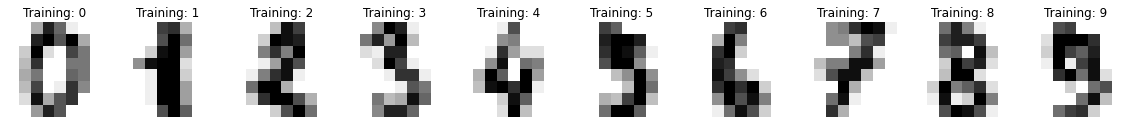

In [106]:
import matplotlib.pyplot as plt

# 이미지 확인
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 20))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [107]:
# feature data와 label data 지정
feature_data = digits.data
label_data = digits.target

## (4) train, test 데이터 분리

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, 
                                                    label_data,
                                                    test_size=0.2,
                                                    random_state=42)

## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf = DecisionTreeClassifier() 

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy
get_clf_eval(y_test, pred, avg='micro')
# scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
# print("교차 검증별 정확도: ", np.round(scores, 4))
# print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

오차 행렬
[[29  0  1  0  1  1  0  1  0  0]
 [ 0 22  1  0  1  0  1  1  1  1]
 [ 1  0 27  3  1  0  1  0  0  0]
 [ 0  0  1 29  0  0  0  1  2  1]
 [ 0  2  0  0 42  0  0  2  0  0]
 [ 0  0  0  0  2 44  1  0  0  0]
 [ 0  0  1  0  2  0 32  0  0  0]
 [ 0  0  0  2  1  0  0 31  0  0]
 [ 0  2  0  2  1  2  0  0 20  3]
 [ 0  1  0  3  2  0  0  1  0 33]]
정확도:  0.000000, 정밀도:  1.000000, 재현율:  2.000000


In [110]:
from sklearn.model_selection import GridSearchCV

# hyperparameters
parameters = {'max_depth': [8, 9, 10], 'min_samples_split': [8, 9, 10, 11]}

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)

In [111]:
# 순차적으로 학습
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 8, 'min_samples_split': 8}",0.815588,10,0.839248,0.799582,0.807933
1,"{'max_depth': 8, 'min_samples_split': 9}",0.814892,12,0.839248,0.797495,0.807933
2,"{'max_depth': 8, 'min_samples_split': 10}",0.815588,10,0.830898,0.803758,0.812109
3,"{'max_depth': 8, 'min_samples_split': 11}",0.819763,7,0.841336,0.799582,0.818372
4,"{'max_depth': 9, 'min_samples_split': 8}",0.823243,4,0.845511,0.803758,0.820459
5,"{'max_depth': 9, 'min_samples_split': 9}",0.819763,8,0.847599,0.799582,0.812109
6,"{'max_depth': 9, 'min_samples_split': 10}",0.819068,9,0.839248,0.803758,0.814196
7,"{'max_depth': 9, 'min_samples_split': 11}",0.820459,5,0.837161,0.805846,0.818372
8,"{'max_depth': 10, 'min_samples_split': 8}",0.824635,2,0.843424,0.807933,0.822547
9,"{'max_depth': 10, 'min_samples_split': 9}",0.824635,3,0.839248,0.810021,0.824635


### Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9806


In [113]:
scores = cross_val_score(rf_clf, digits.data, digits.target, scoring='accuracy', cv=5)
print("교차 검증별 정확도: ", np.round(scores, 4))
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.9306 0.9083 0.9666 0.961  0.922 ]
평균 검증 정확도:  0.9377


### Support Vector Machine (SVM)

In [114]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()

svm_model.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9806


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [115]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()

sgc_clf.fit(X_train, y_train)

pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9583


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9722


## (6) 모델을 평가해 보기
- 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 
- 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? 
- sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

In [ ]:
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, pred))
print()
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

# 2-12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다
- `load_wine` : 와인 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine))

## (1) 필요한 모듈 import하기

In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [11]:
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [10]:
print_data_info(wine)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (178, 13)

feature_name 출력: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

feature_name의 type:  <class 'list'>
feature_name의 shape:  13

target_name:  ['class_0' 'class_1' 'class_2']
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  3

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (178,)



In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['label'] = wine.target
wine_df['label'].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

In [ ]:
wine_data = wine.data
wine_target = wine.target

## (4) train, test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_target,
                                                   test_size=0.2,
                                                   random_state=42)

## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9444444444444444

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
accuracy

1.0

### Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()

svm_model.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 1.0000


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()

sgc_clf.fit(X_train, y_train)

pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.7222


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 1.0000


## (6) 모델을 평가해 보기
- 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 
- 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? 
- sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

# 2-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다


- `load_breast_cancer` : 유방암 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer))

- 재현율이 중요

## (1) 필요한 모듈 import하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [ ]:
breast_cancer = load_breast_cancer()

## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [ ]:
print_data_info(breast_cancer)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (569, 30)

feature_name 출력: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

feature_name의 type:  <class 'numpy.ndarray'>
feature_name의 shape:  30

target_name:  ['malignant' 'benign']
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  2

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (569,)



In [ ]:
cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
cancer_df['label'] = breast_cancer.target
cancer_df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [ ]:
cancer_data = breast_cancer.data
cancer_target = breast_cancer.target

## (4) train, test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_target,
                                                   test_size=0.2,
                                                   random_state=42)

## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9473684210526315

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9649122807017544

### Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()

svm_model.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9825


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()

sgc_clf.fit(X_train, y_train)

pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9474


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9737


## (6) 모델을 평가해 보기
- 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 
- 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? 
- sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

## 참고 자료

- [[Python] 어떤 스케일러를 쓸 것인가?](https://mkjjo.github.io/python/2019/01/10/scaler.html)
- [로지스틱회귀(Logistic Regression) – 파이썬 코드 예제](http://hleecaster.com/ml-logistic-regression-example/)

- 교차검증(cross_val_score)
- GridSearchCV - 교차 검ㅈ으과 최적 하이퍼파라미터 튜닝 한 
- 원핫인코딩
- 피처 스케일링
    - 표준화(Standardization)
    - 정규화(Normalization)
- 정밀도와 재현율의 임곗값에 따른 값 변화 그래프
- confusion, accuracy, precision, recall, f1
- ROC 곡선과 AUC
- 결정 트리 시각화
- XGBoost, LightGBM